In [ ]:
#DATA CLEANING AND PREPROCESSING

In [5]:
import pandas as pd
import numpy as py
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
raw_data = pd.read_csv(r"C:\Users\hp\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

raw_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
print(raw_data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [6]:
raw_data.to_csv('raw_data_copy.csv', index=False)

In [8]:
#Check for missing values in the entire DataFrame

missing_values = raw_data.isnull().sum()

In [9]:
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [15]:
#checking data type of a column

print(raw_data['TotalCharges'].dtype)

object


In [17]:
#Convert the TotalCharges Column to a Numeric data type

raw_data['TotalCharges'] = pd.to_numeric(raw_data['TotalCharges'], errors = 'coerce')

In [18]:
#check data type after conversion

print(raw_data['TotalCharges'].dtype)

float64


In [19]:
#Missing values in TotalCharges column

raw_data[raw_data['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [23]:
# Drop rows with missing values in 'TotalCharges' Column

raw_data.dropna(subset=['TotalCharges'], inplace=True)


In [25]:
raw_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [22]:
#Check for duplicates

duplicate_count = raw_data.duplicated().sum

In [12]:
print("Number of duplicates:",duplicate_count)

Number of duplicates: 0


In [35]:
raw_data.shape[0]

7032

In [36]:
#check for duplicates - another way

raw_data.duplicated().any().sum()

1

In [37]:
#drop duplicates values

raw_data.drop_duplicates(inplace=True, keep='first')

In [38]:
#recheck shape

raw_data.shape[0]

7010

In [39]:
raw_data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
#Remove unnecessary columns

raw_data.drop(['customerID'],axis=1, inplace=True)

raw_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [31]:
#Unique elements of the Payment method column

raw_data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [33]:
#Remove "automatic" from payment method names

raw_data['PaymentMethod'] = raw_data['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [34]:
#Unique elements of the Payment method column after modification

raw_data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [26]:
#Check for Outliers

print(raw_data.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000


In [27]:
import matplotlib.pyplot as plt

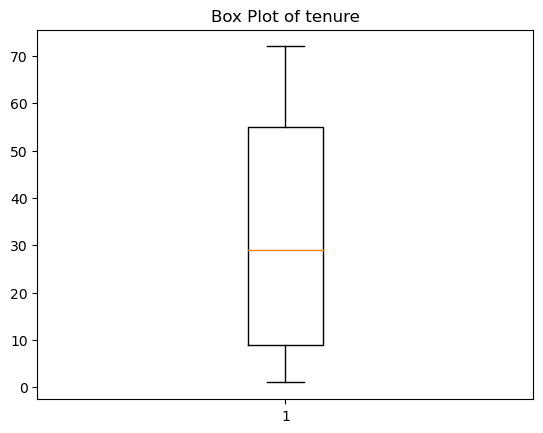

In [28]:
#Create a box plot for the tenure column

plt.boxplot(raw_data['tenure'])
plt.title('Box Plot of tenure')
plt.show()

In [ ]:
#DATA EXPLORATION AND VISUALISATION

In [41]:
#Calculate descriptive statistics for numeric columns

raw_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


In [42]:
numeric_summary = raw_data.describe()

In [44]:
#Calculate mode for categorical columns

categorical_summary = raw_data[['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']].mode()

In [45]:
#Combine the summaries for a comprehensive overview

data_summary = pd.concat([numeric_summary, categorical_summary], axis=0)

In [46]:
#Print Summary

print(data_summary)

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7010.000000  7010.000000     7010.000000   7010.000000
mean        0.162767    32.520399       64.888666   2290.353388
std         0.369180    24.520441       30.064769   2266.820832
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.750000    408.312500
50%         0.000000    29.000000       70.400000   1403.875000
75%         0.000000    56.000000       89.900000   3807.837500
max         1.000000    72.000000      118.750000   8684.800000
0           0.000000     1.000000       20.050000     19.750000


In [47]:
import seaborn as sns

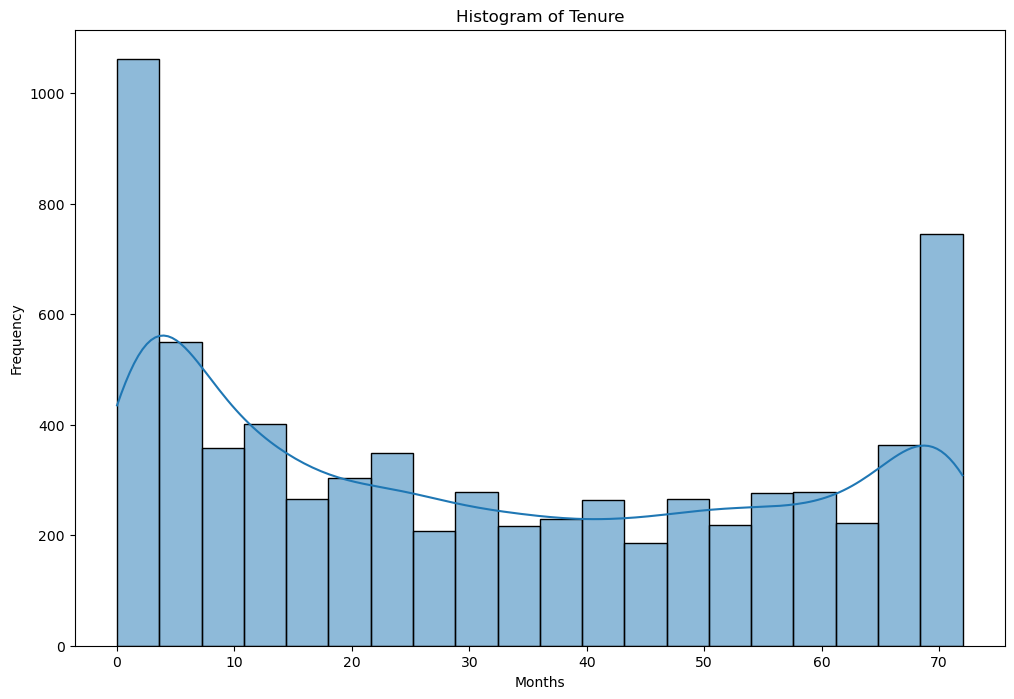

In [9]:
#Explore the distribution of numeric variables using histograms

plt.figure(figsize=(12, 8))
sns.histplot(data=raw_data, x='tenure', bins=20, kde=True)
plt.title('Histogram of Tenure')
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Explore categorical variables using bar plots or countplots

In [12]:
#separate the data into two categories based on gender

male_tenure = raw_data.loc[raw_data['gender'] == 'Male', 'tenure']
female_tenure = raw_data.loc[raw_data['gender'] == 'Female', 'tenure']

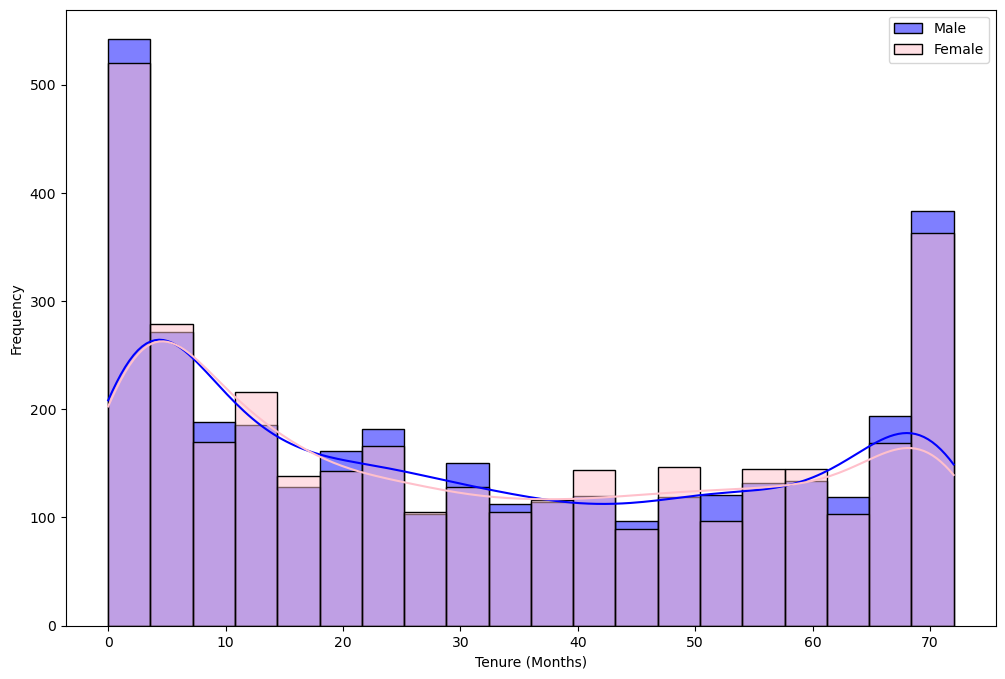

In [14]:
#create a histogram with colours

plt.figure(figsize=(12, 8))
sns.histplot(male_tenure, bins=20, kde=True, color='blue', alpha=0.5, label='Male')
sns.histplot(female_tenure, bins=20, kde=True, color='pink', alpha=0.5, label='Female')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [66]:
#Analyse Customers with and without partners

raw_data['Partner'].value_counts()

No     3617
Yes    3393
Name: Partner, dtype: int64

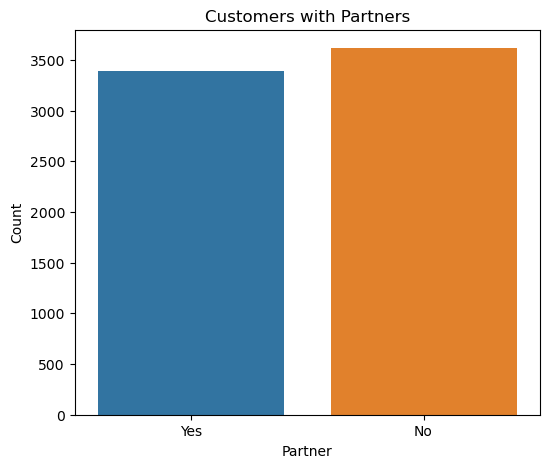

In [68]:
plt.figure(figsize=(6,5))
sns.countplot(x='Partner', data=raw_data)
plt.title('Customers with Partners')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()

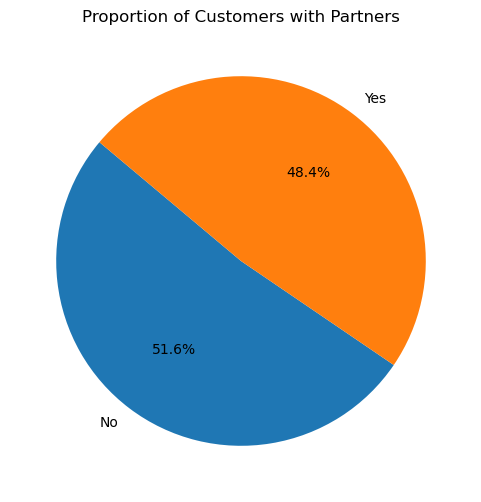

In [85]:
#Piechart to visualise Customers with/without Partners

partner_counts = raw_data['Partner'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(partner_counts, labels=partner_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Customers with Partners')
plt.show()

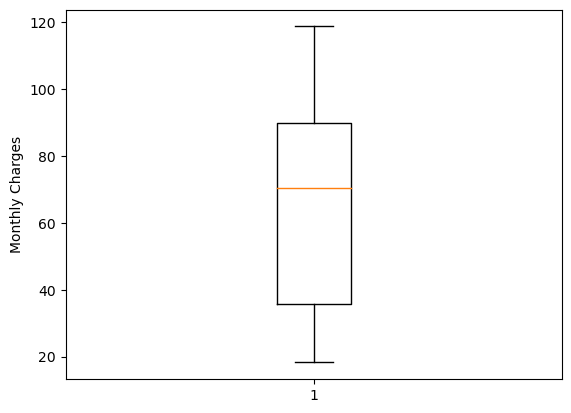

In [69]:
#Create a boxplot of the Monthly Charges column

plt.boxplot(raw_data['MonthlyCharges'])
plt.ylabel('Monthly Charges')
plt.show()

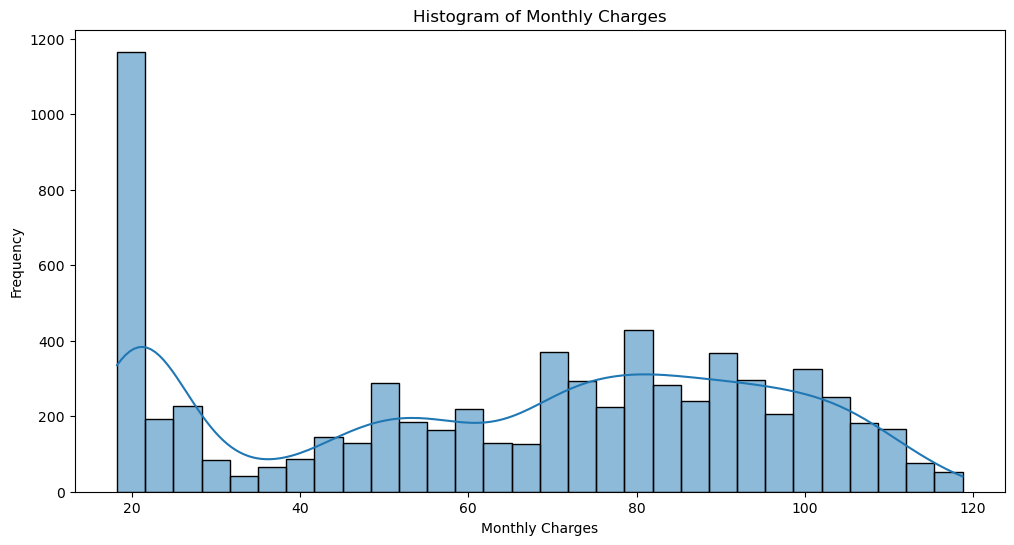

In [76]:
#Create Histogram of the "MonthlyCharges" column

plt.figure(figsize=(12, 6))
sns.histplot(data=raw_data, x='MonthlyCharges', bins=30, kde=True)
plt.title('Histogram of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

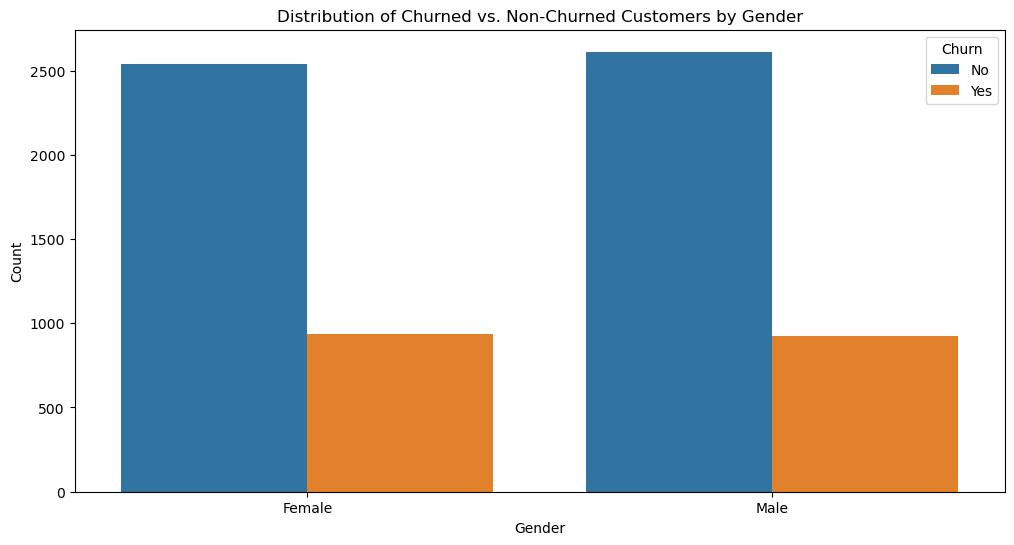

In [75]:
#Bar plot for the Gender Column

plt.figure(figsize=(12, 6))
sns.countplot(x='gender', hue='Churn', data=raw_data)
plt.title('Distribution of Churned vs. Non-Churned Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

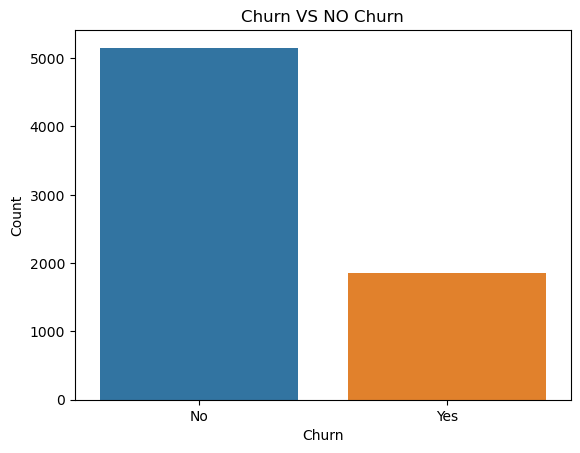

In [71]:
#Churn

sns.countplot(x='Churn', data=raw_data)
plt.title('Churn VS NO Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

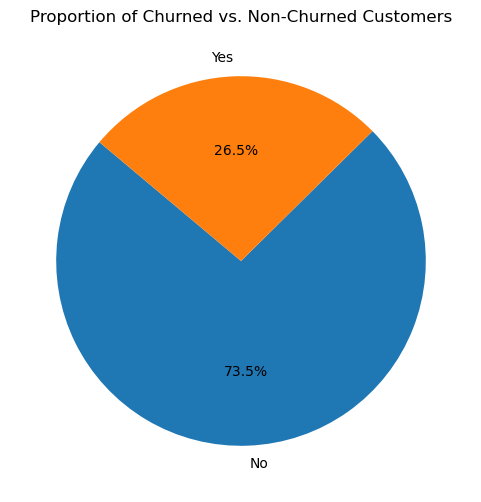

In [80]:
#Pie Chart to visualise the proportion of churned vs. non-churned customers

churn_counts = raw_data['Churn'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Churned vs. Non-Churned Customers')
plt.show()

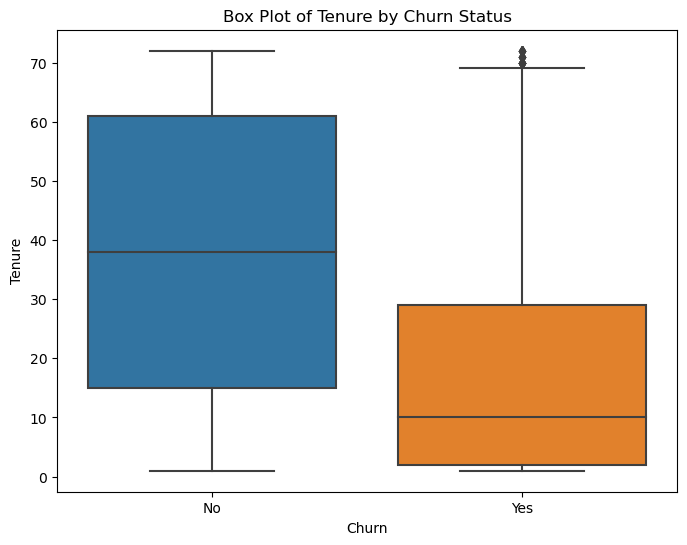

In [101]:
#Box plots to identify outliers

plt.figure(figsize=(8,6))
sns.boxplot(data=raw_data, x='Churn', y='tenure')
plt.title('Box Plot of Tenure by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

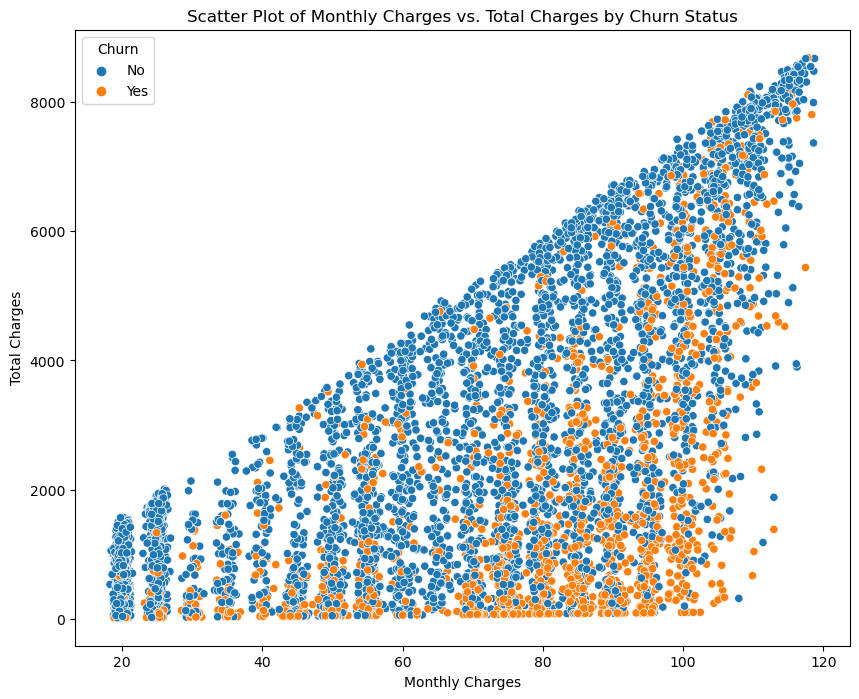

In [97]:
#Scatter plots to explore relationships between Monthly and Total Charges

plt.figure(figsize=(10, 8))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=raw_data, hue="Churn")
plt.title('Scatter Plot of Monthly Charges vs. Total Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel ('Total Charges')
plt.show()

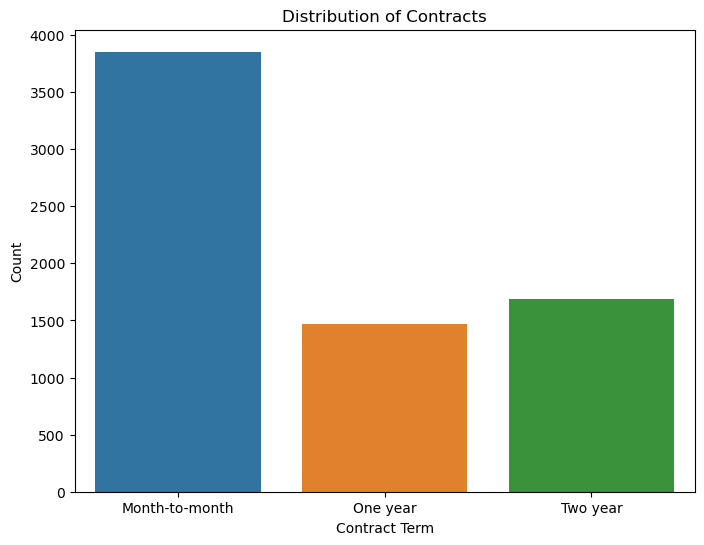

In [81]:
#Distribution of the Contract column

plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data=raw_data)
plt.title('Distribution of Contracts')
plt.xlabel('Contract Term')
plt.ylabel('Count')
plt.show()

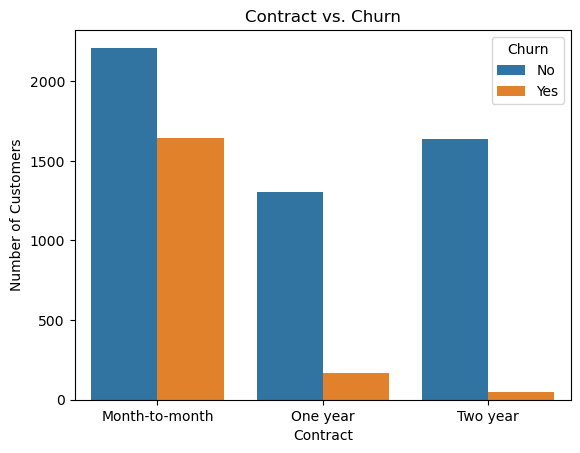

In [98]:
#Relationship between Customer Churn and Contract type

sns.countplot(x='Contract', hue='Churn', data= raw_data)
plt.title('Contract vs. Churn')
plt.xlabel('Contract')
plt.ylabel('Number of Customers')
plt.show()

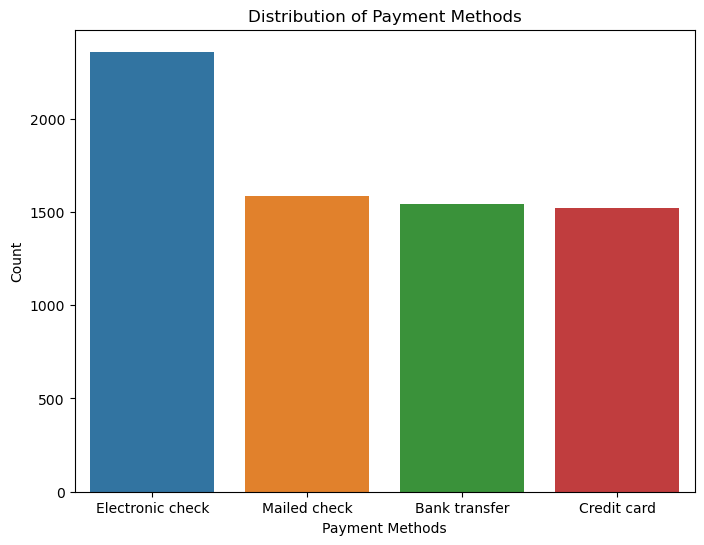

In [99]:
#Payment method column

plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', data=raw_data)
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Methods')
plt.ylabel('Count')
plt.show()

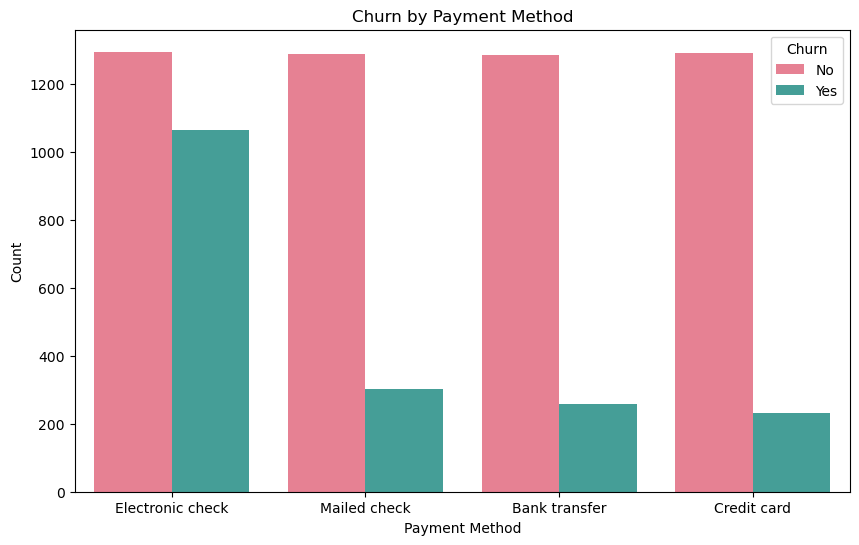

In [100]:
#Relationship between Payment Methods and Customer Churn

plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod',hue='Churn', data=raw_data, palette='husl')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

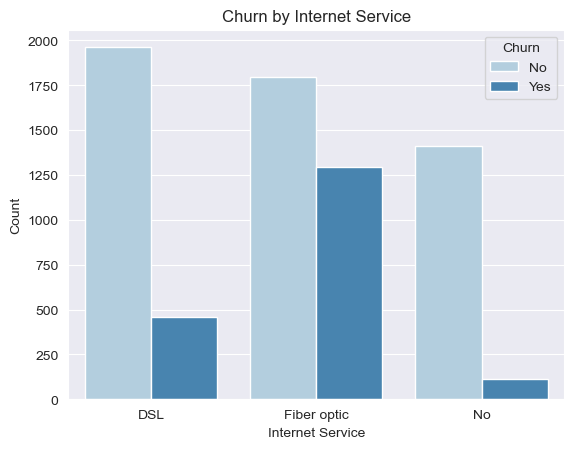

In [16]:
#Relationship between Internet Service and Churn.

sns.set_style('darkgrid')

#Create a stacked bar plot
sns.countplot(x='InternetService', hue='Churn', data=raw_data, palette='Blues')

#Set the title and axis labels
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')

#Display the plot
plt.show()